Concernant l’analyse de données prévue sous peu, plusieurs aspects doivent être couverts.
Dans un premier temps, je vais avoir besoin de différents indicateurs et graphiques autour du
chiffre d'affaires. Peux-tu également regarder l’évolution dans le temps et mettre en place une
décomposition en moyenne mobile pour évaluer la tendance globale ?
Il serait également intéressant de faire un zoom sur les références, pour voir un peu les tops et les
flops, la répartition par catégorie, etc.
Enfin, j’aimerais avoir quelques informations sur les profils de nos clients, et également la
répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.

In [1]:
# import les librairies pandas et numpy
import pandas as pd
import numpy as np

#on importe la librairie seaborn et matplotlib pour le rendu visuel

import seaborn as sns
import matplotlib.pyplot as plt

# Importation datetime

from datetime import datetime
from datetime import date

# pour eviter les messages d'erreurs
import warnings
warnings.filterwarnings(action='ignore')

# test statistique
import statsmodels.api as sm
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

In [2]:
# lecture des fichiers csv

customers = pd.read_csv('customers.csv', sep=';')

product = pd.read_csv('products.csv', sep=';')

transactions = pd.read_csv('transactions.csv', sep=';')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1. - Exploration du fichier customers</h3>
</div>

In [3]:
print('nombre de ligne',customers.shape[0])
print('nombre de colonne',customers.shape[1])

nombre de ligne 8621
nombre de colonne 3


In [4]:
customers.count()

client_id    8621
sex          8621
birth        8621
dtype: int64

In [5]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [6]:
customers.columns

Index(['client_id', 'sex', 'birth'], dtype='object')

In [7]:
customers['age'] = pd.to_datetime('today').year - customers['birth']
customers['age'] = customers['age'].astype(int)

In [8]:
customers['tranche_age'] = pd.cut(customers['age'],bins=[9,19,29,39,49,59,69,79,89,99],
                               labels=['10-19', '20-29', '30-39', '40-49','50-59','60-69','70-79', '80-89', '90-99'])

In [9]:
customers['tranche_age'] = customers['tranche_age'].astype('category')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Exploration du fichier product</h3>
</div>

In [10]:
product.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [11]:
print('nombre de ligne',product.shape[0])
print('nombre de colonne',product.shape[1])

nombre de ligne 3286
nombre de colonne 3


In [12]:
product.columns

Index(['id_prod', 'price', 'categ'], dtype='object')

In [13]:
product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Exploration du fichier transaction</h3>
</div>

In [14]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [15]:
print('nombre de ligne',transactions.shape[0])
print('nombre de colonne',transactions.shape[1])

nombre de ligne 687534
nombre de colonne 4


In [16]:
transactions.columns

Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')

In [17]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.0 - Jointure des fichiers</h3>
</div>

In [18]:
transactions_customers = pd.merge(transactions, customers, on=['client_id'], how='inner')

In [19]:
df_final = pd.merge(transactions_customers, product, on=['id_prod'], how='inner')

In [20]:
df_final.sort_values(by ='date', inplace = True)

In [21]:
df_final.dtypes

id_prod          object
date             object
session_id       object
client_id        object
sex              object
birth             int64
age               int32
tranche_age    category
price           float64
categ             int64
dtype: object

In [22]:
df_final

,id_prod,date,session_id,client_id,sex,birth,age,tranche_age,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,56,50-59,11.99,0
25141,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,63,60-69,19.37,0
56676,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,35,30-39,4.50,0
144726,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,34,30-39,6.55,0
75241,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,67,60-69,16.49,0
...,...,...,...,...,...,...,...,...,...,...
409473,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,27,20-29,21.92,1
655488,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,29,20-29,48.99,2
390251,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,38,30-39,26.99,1
189265,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,70,70-79,8.99,0


In [23]:
df_final['date'] = pd.to_datetime(df_final['date'],errors='coerce')

In [24]:
df_final.isnull().sum()*100/df_final.shape[0]

id_prod        0.000000
date           0.034326
session_id     0.000000
client_id      0.000000
sex            0.000000
birth          0.000000
age            0.000000
tranche_age    0.000000
price          0.000000
categ          0.000000
dtype: float64

In [25]:
df_final.dropna(how ='any',inplace=True)

In [26]:
df_final['year'] = pd.to_datetime(df_final['date']).dt.strftime('%Y')

In [27]:
df_final['Year_Month'] = pd.to_datetime(df_final['date']).dt.strftime('%Y-%m')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Description du dataframe</h3>
</div>

In [28]:
df_cat_0 = df_final.loc[df_final['categ']== 0]

In [29]:
df_final['price'] = df_final['price'].replace(np.nan, df_cat_0['price'].median())

In [30]:
df_cat_0 = df_final.loc[df_final['categ']== 0]
df_cat_0

,id_prod,date,session_id,client_id,sex,birth,age,tranche_age,price,categ,year,Year_Month
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,56,50-59,11.99,0,2021,2021-03
25141,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,63,60-69,19.37,0,2021,2021-03
56676,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,35,30-39,4.50,0,2021,2021-03
144726,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,34,30-39,6.55,0,2021,2021-03
75241,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,67,60-69,16.49,0,2021,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
398853,0_1435,2023-02-28 23:36:25.400073,s_348428,c_7481,m,1986,37,30-39,13.99,0,2023,2023-02
388003,0_1039,2023-02-28 23:43:05.079569,s_348438,c_7144,f,1984,39,30-39,11.99,0,2023,2023-02
399092,0_998,2023-02-28 23:47:05.145663,s_348427,c_4476,f,1977,46,40-49,9.41,0,2023,2023-02
189265,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,70,70-79,8.99,0,2023,2023-02


In [31]:
df_cat_1 = df_final.loc[df_final['categ']== 1]
df_cat_1

,id_prod,date,session_id,client_id,sex,birth,age,tranche_age,price,categ,year,Year_Month
459501,1_445,2021-03-01 00:09:11.523122,s_8,c_7991,m,1968,55,50-59,23.99,1,2021,2021-03
349703,1_556,2021-03-01 00:10:20.265265,s_9,c_6171,m,1983,40,40-49,24.47,1,2021,2021-03
604496,1_635,2021-03-01 00:10:33.163037,s_10,c_2218,f,1970,53,50-59,26.99,1,2021,2021-03
488481,1_503,2021-03-01 00:12:38.133768,s_12,c_2505,f,1982,41,40-49,26.99,1,2021,2021-03
145791,1_310,2021-03-01 00:17:11.089942,s_4,c_7912,f,1989,34,30-39,14.20,1,2021,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
59476,1_417,2023-02-28 23:45:54.817107,s_348438,c_7144,f,1984,39,30-39,20.99,1,2023,2023-02
581774,1_551,2023-02-28 23:45:54.822218,s_348442,c_7932,f,1980,43,40-49,14.99,1,2023,2023-02
175299,1_366,2023-02-28 23:48:53.349647,s_348443,c_4999,f,1972,51,50-59,28.54,1,2023,2023-02
409473,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,27,20-29,21.92,1,2023,2023-02


In [32]:
df_cat_2 = df_final.loc[df_final['categ']== 2]

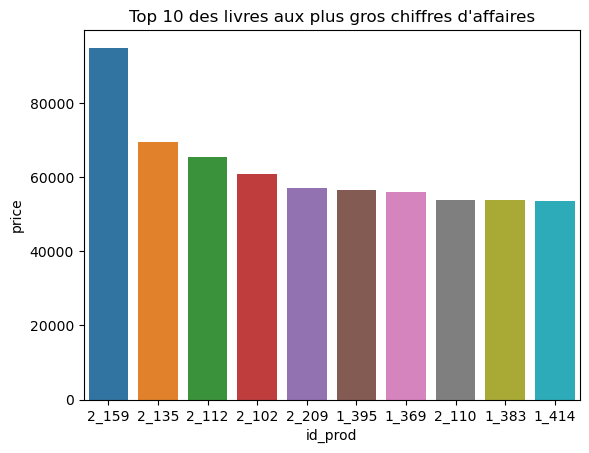

In [33]:
sns.barplot(x= 'id_prod',y='price',data = df_final.pivot_table(index=['id_prod', 'categ'], aggfunc={'price': np.sum}).sort_values(by='price', ascending=False).reset_index().head(10)
)
plt.title("Top 10 des livres aux plus gros chiffres d'affaires")
plt.show()

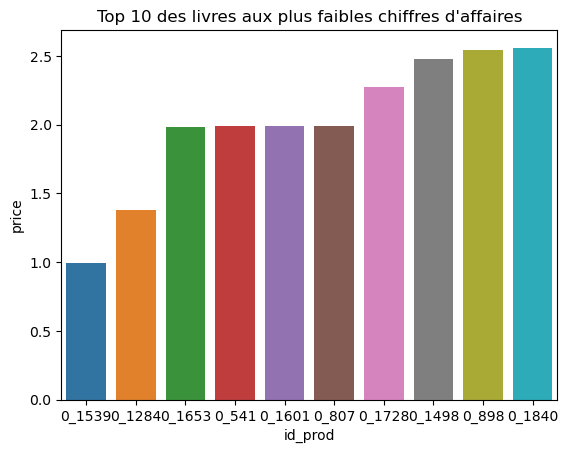

In [34]:
sns.barplot(x= 'id_prod',y='price',data = df_final.pivot_table(index=['id_prod', 'categ'], aggfunc={'price': np.sum}).sort_values(by='price', ascending=True).reset_index().head(10))
plt.title("Top 10 des livres aux plus faibles chiffres d'affaires")
plt.show()

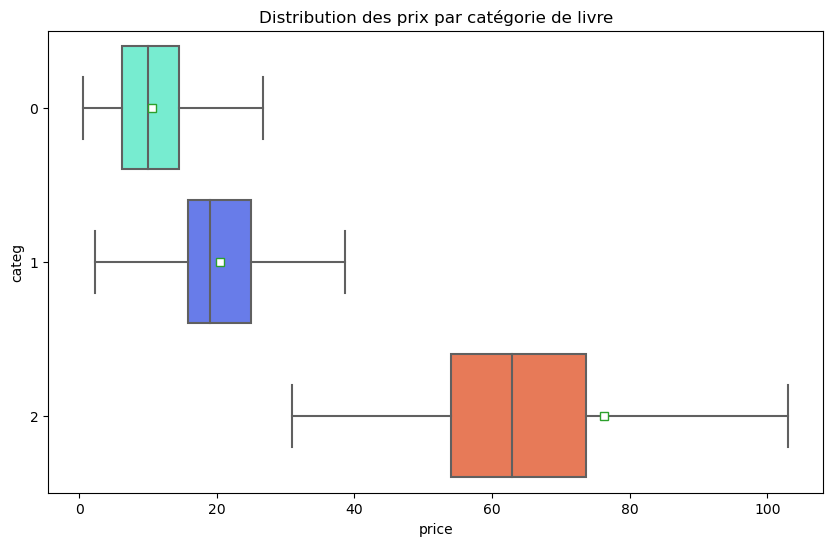

In [35]:
# Distribution des catégories avec moyenne des prix
plt.figure(figsize=(10,6))
sns.boxplot(data=df_final, y='categ', x='price', orient='h', showfliers=False, showmeans=True, palette=["#64ffda", "#536dfe", "#ff6e40"], meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des prix par catégorie de livre')
plt.show()

In [36]:
df_final

,id_prod,date,session_id,client_id,sex,birth,age,tranche_age,price,categ,year,Year_Month
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,56,50-59,11.99,0,2021,2021-03
25141,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,63,60-69,19.37,0,2021,2021-03
56676,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,35,30-39,4.50,0,2021,2021-03
144726,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,34,30-39,6.55,0,2021,2021-03
75241,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,67,60-69,16.49,0,2021,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
409473,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,27,20-29,21.92,1,2023,2023-02
655488,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,29,20-29,48.99,2,2023,2023-02
390251,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,38,30-39,26.99,1,2023,2023-02
189265,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,70,70-79,8.99,0,2023,2023-02


In [37]:
df_mean_buy_client = df_final.loc[:,['client_id', 'price']].groupby('client_id').agg(total_achats = ('price', sum)).reset_index()

In [38]:
df = df_final.groupby('client_id')['id_prod'].value_counts().to_frame().rename(columns={'id_prod': 'nombre_achat'}).reset_index()

In [39]:
df = df.groupby('client_id')['nombre_achat'].sum().to_frame()

df_mean_buy_client = pd.merge(df_mean_buy_client, df, on=['client_id'], how='left')

In [40]:
# calcul du panier moyen
df_mean_buy_client['panier_moyen'] = df_mean_buy_client['total_achats'] / df_mean_buy_client['nombre_achat']

In [41]:
# regrouper par année/mois/jour la somme des prix
df_ca_mois = df_final.groupby('Year_Month')['price'].sum().to_frame()
df_ca_mois = df_ca_mois.reset_index()
df_ca_mois['Year_Month'].count()

24

In [42]:
df_mean_buy_client['frequence_achat_mensuel'] = df_mean_buy_client['nombre_achat'] / df_ca_mois['Year_Month'].count()

In [43]:
df_final = pd.merge(df_mean_buy_client, df_final, on=['client_id'], how='left')

In [44]:
df_final

,client_id,total_achats,nombre_achat,panier_moyen,frequence_achat_mensuel,id_prod,date,session_id,sex,birth,age,tranche_age,price,categ,year,Year_Month
0,c_1,629.02,43,14.628372,1.791667,0_1470,2021-06-11 21:02:39.382765,s_47346,m,1955,68,60-69,19.53,0,2021,2021-06
1,c_1,629.02,43,14.628372,1.791667,0_513,2021-07-21 22:41:38.769525,s_65433,m,1955,68,60-69,11.99,0,2021,2021-07
2,c_1,629.02,43,14.628372,1.791667,0_1186,2021-07-25 12:17:34.446678,s_66947,m,1955,68,60-69,12.30,0,2021,2021-07
3,c_1,629.02,43,14.628372,1.791667,0_1448,2021-07-26 17:37:29.438136,s_67467,m,1955,68,60-69,18.94,0,2021,2021-07
4,c_1,629.02,43,14.628372,1.791667,0_1475,2021-07-27 10:30:00.293075,s_67769,m,1955,68,60-69,11.99,0,2021,2021-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687293,c_999,701.40,46,15.247826,1.916667,0_1360,2023-01-15 17:53:15.077669,s_327362,m,1964,59,50-59,4.33,0,2023,2023-01
687294,c_999,701.40,46,15.247826,1.916667,1_351,2023-01-21 17:16:06.807620,s_330231,m,1964,59,50-59,28.99,1,2023,2023-01
687295,c_999,701.40,46,15.247826,1.916667,1_727,2023-01-21 17:40:50.856434,s_330231,m,1964,59,50-59,16.99,1,2023,2023-01
687296,c_999,701.40,46,15.247826,1.916667,0_1442,2023-01-28 13:12:42.429052,s_333631,m,1964,59,50-59,4.89,0,2023,2023-01


In [133]:
df_final['price'].sum() 

12022673.55

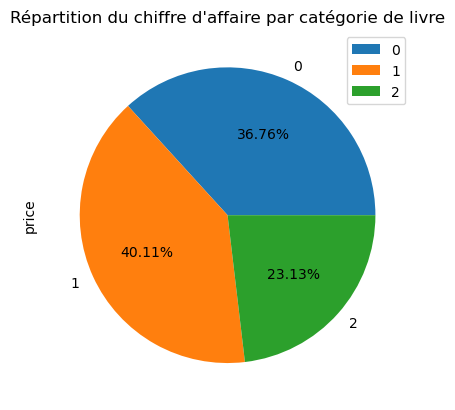

In [45]:
# Chiffre d'affaires par catégorie
data=df_final.pivot_table(index='categ', aggfunc={'price': np.sum}).plot(
    kind='pie', y='price',
    legend=True,
    autopct=lambda x: str(round(x, 2)) + '%'
)
plt.title("Répartition du chiffre d'affaire par catégorie de livre")
plt.show()

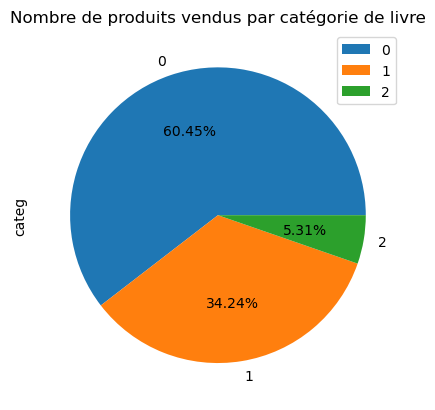

In [46]:
data=df_final['categ'].value_counts().plot(
    kind='pie', y='price',
    legend=True,
    autopct=lambda x: str(round(x, 2)) + '%'
)
plt.title("Nombre de produits vendus par catégorie de livre")
plt.show()

In [47]:
df_nb_transaction_client = df_final[['client_id','id_prod','tranche_age','price']]

In [48]:
df_nb_transaction_client

,client_id,id_prod,tranche_age,price
0,c_1,0_1470,60-69,19.53
1,c_1,0_513,60-69,11.99
2,c_1,0_1186,60-69,12.30
3,c_1,0_1448,60-69,18.94
4,c_1,0_1475,60-69,11.99
...,...,...,...,...
687293,c_999,0_1360,50-59,4.33
687294,c_999,1_351,50-59,28.99
687295,c_999,1_727,50-59,16.99
687296,c_999,0_1442,50-59,4.89


In [49]:
# nombre de transaction par tranche age par client au total
df_nb_transaction_client.groupby(['tranche_age'])['client_id'].count().reset_index().sort_values(by='client_id',ascending=False)

,tranche_age,client_id
3,40-49,234060
2,30-39,166237
4,50-59,118164
5,60-69,57996
1,20-29,55597
6,70-79,26811
0,10-19,15495
7,80-89,11680
8,90-99,1258


In [50]:
# nombre de transaction par client
df_nb_transaction_client = df_nb_transaction_client.groupby(['client_id'])['id_prod'].value_counts().to_frame()

In [51]:
df_nb_transaction_client.rename(columns = {'id_prod': 'nb_transaction'}, inplace = True)

In [52]:
df_nb_transaction_client.reset_index(inplace=True)

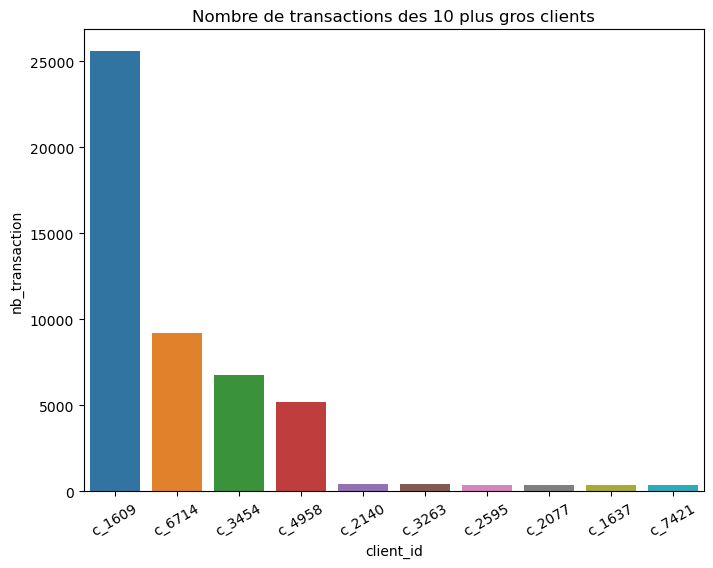

In [53]:
df_t = df_nb_transaction_client.groupby('client_id')['nb_transaction'].sum().to_frame().sort_values(by='nb_transaction', ascending=False).head(10)
df_t.reset_index(inplace=True)

# on constate que les 4 premiers acheteurs dépassent trs largement l'ensemble des clients
plt.figure(figsize=(8,6))
sns.barplot(data=df_t, x='client_id', y='nb_transaction')
plt.title("Nombre de transactions des 10 plus gros clients")
plt.xticks(rotation = 30)
plt.xlabel('client_id')
plt.ylabel('nb_transaction')
plt.show()

In [54]:
x = df_final.groupby('client_id')['price'].sum().to_frame().reset_index().sort_values(by='price',ascending=False).rename(
    columns={'price': 'ca_total'}).head(10)

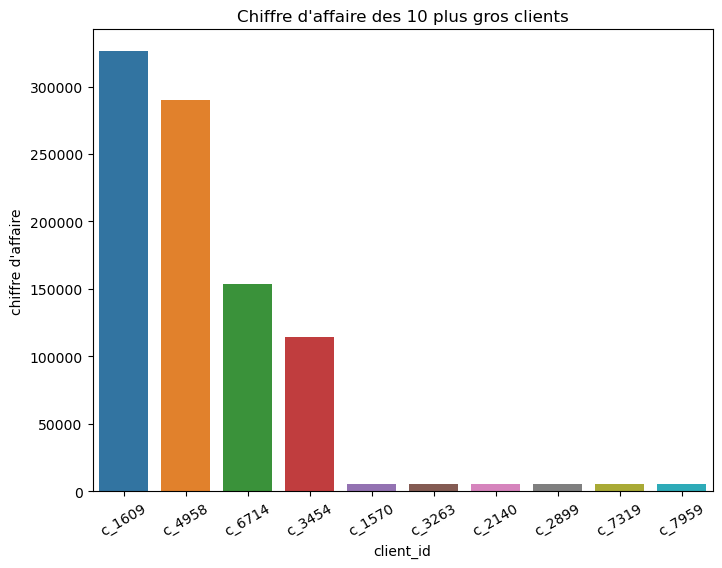

In [55]:
plt.figure(figsize=(8,6))
sns.barplot(data=x, x='client_id', y='ca_total')
plt.title("Chiffre d'affaire des 10 plus gros clients")
plt.xticks(rotation = 30)
plt.xlabel('client_id')
plt.ylabel("chiffre d'affaire")
plt.show()

In [56]:
# on constate que le client c_4958 gros chiffre d'affaire moins de d'achat 

In [57]:
df_final['pro_part'] = 'part'

In [58]:
# Liste des ID clients à filtrer
client_ids_to_filter = ['c_1609', 'c_4958', 'c_6714', 'c_3454']

# Filtrer les lignes avec les ID clients spécifiés
df_final.loc[df_final['client_id'].isin(client_ids_to_filter), 'pro_part'] = 'pro'

In [59]:
df_pro = df_final.loc[df_final['pro_part']=='pro']
df_part = df_final.loc[df_final['pro_part']=='part']

In [60]:
# nombre de transaction total / nombre de transaction pro pour avoir le nombre de pourcentage de transaction des pro
nb_t = df_pro.groupby(['client_id']).count()['id_prod'].sum() / df_final.groupby(['client_id']).count()['id_prod'].sum() * 100
print("pourcentage des transactions des 4 pro est de",(nb_t),"%")

pourcentage des transactions des 4 pro est de 6.809273415607203 %


In [61]:
print("chiffre d'affaire des 4 pro est de",round(df_pro['price'].sum() / df_part['price'].sum() * 100, 2),"%")

chiffre d'affaire des 4 pro est de 7.94 %


In [62]:
# ca des 4 clients prof
df_pro.groupby('client_id')['price'].sum().to_frame().sort_values(by='price', ascending=False)

,price
client_id,
c_1609,326039.89
c_4958,290227.03
c_6714,153918.60
c_3454,114110.57


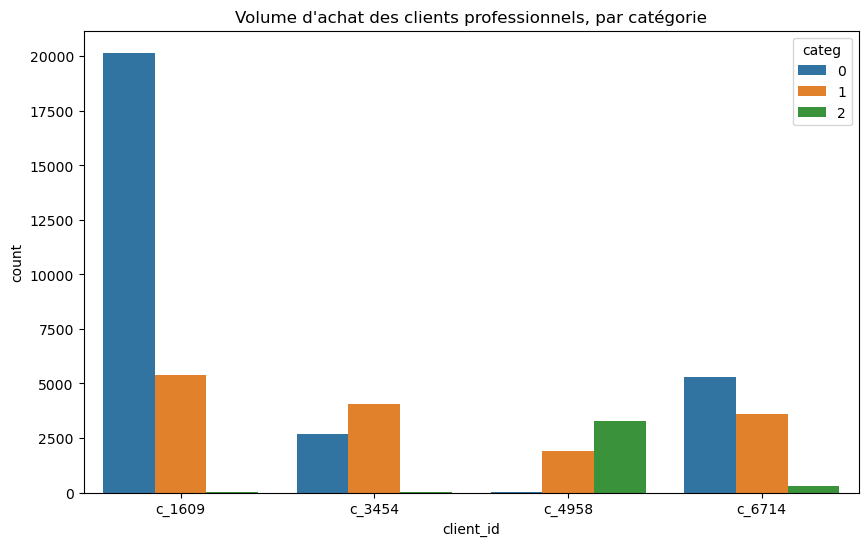

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_pro, x='client_id', hue='categ')
plt.title("Volume d'achat des clients professionnels, par catégorie")
plt.show()

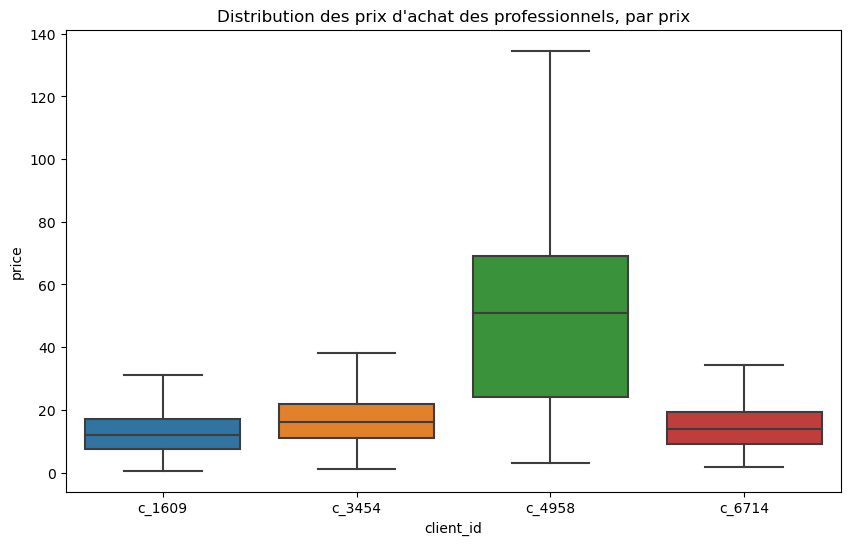

In [64]:
plt.figure(figsize=(10,6))
# showfliers enleve les outliers
sns.boxplot(data=df_pro, y='price', x='client_id', showfliers=False)
plt.title("Distribution des prix d'achat des professionnels, par prix")
plt.show()

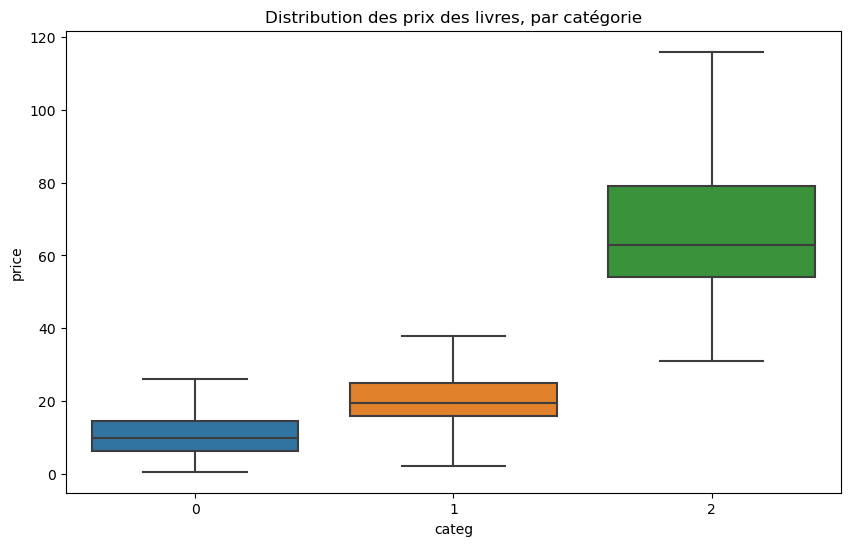

In [65]:
plt.figure(figsize=(10,6))
# showfliers enleve les outliers
sns.boxplot(data=df_pro, y='price', x='categ', showfliers=False)
plt.title("Distribution des prix des livres, par catégorie")
plt.show()

In [67]:
pro = df_pro.pivot_table(index=['client_id','categ','sex'], values=['client_id', 'total_achats', 'nombre_achat', 'panier_moyen',
       'frequence_achat_mensuel', 'id_prod', 'date', 'session_id', 'sex',
       'birth', 'age', 'tranche_age', 'price', 'categ', 'year', 'Year_Month',
       'pro_part']).reset_index()

In [68]:
pro

,client_id,categ,sex,age,birth,frequence_achat_mensuel,nombre_achat,panier_moyen,price,total_achats
0,c_1609,0,m,43,1980,1066.083333,25586,12.742902,10.633572,326039.89
1,c_1609,1,m,43,1980,1066.083333,25586,12.742902,20.357145,326039.89
2,c_1609,2,m,43,1980,1066.083333,25586,12.742902,136.473636,326039.89
3,c_3454,0,m,54,1969,283.041667,6793,16.798259,10.671001,114110.57
4,c_3454,1,m,54,1969,283.041667,6793,16.798259,20.611981,114110.57
5,c_3454,2,m,54,1969,283.041667,6793,16.798259,70.845556,114110.57
6,c_4958,0,m,24,1999,217.583333,5222,55.577754,12.190000,290227.03
7,c_4958,1,m,24,1999,217.583333,5222,55.577754,20.805185,290227.03
8,c_4958,2,m,24,1999,217.583333,5222,55.577754,75.790596,290227.03
9,c_6714,0,f,55,1968,383.291667,9199,16.732101,10.782409,153918.60


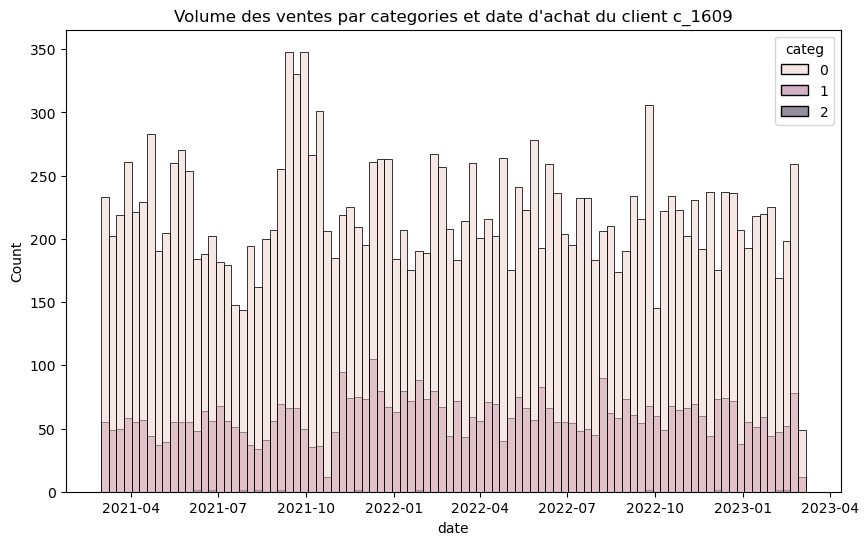

In [69]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_pro[df_pro['client_id']=='c_1609'], x='date', hue='categ', binwidth=8)
plt.title("Volume des ventes par categories et date d'achat du client c_1609")
plt.show()

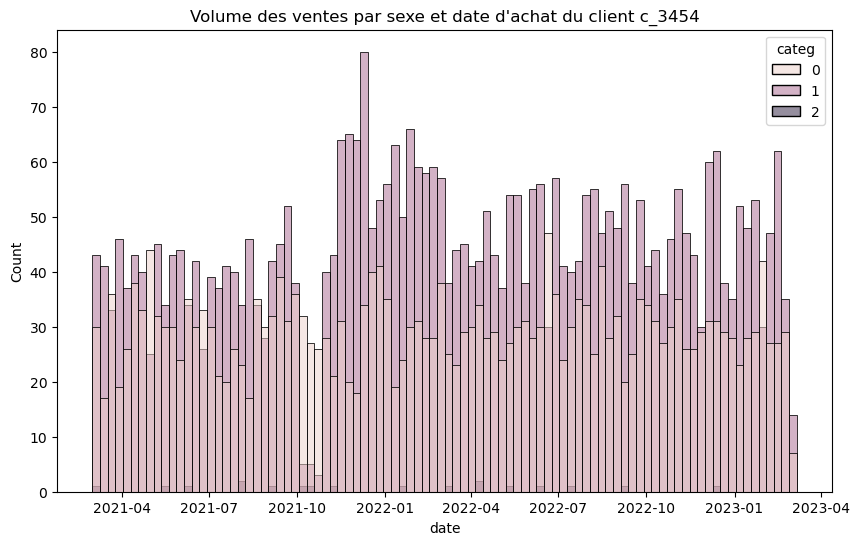

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_pro[df_pro['client_id']=='c_3454'], x='date', hue='categ', binwidth=8)
plt.title("Volume des ventes par sexe et date d'achat du client c_3454")
plt.show()

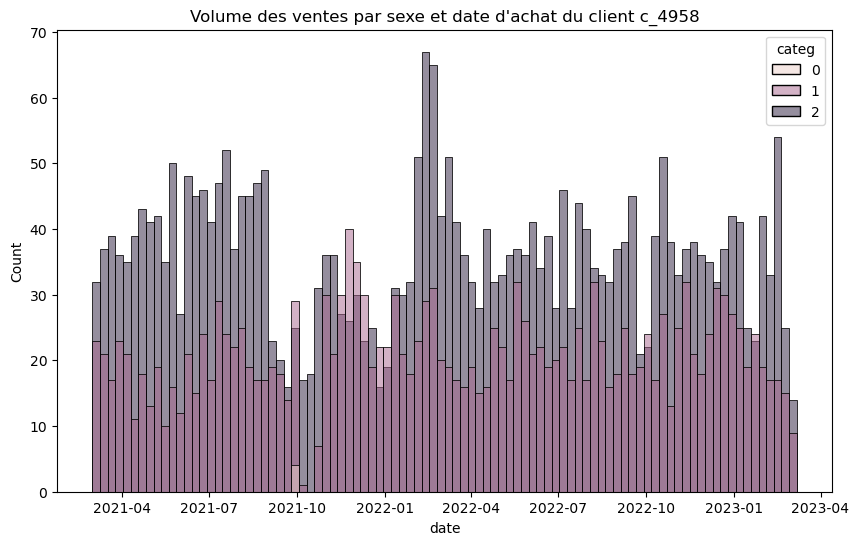

In [71]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_pro[df_pro['client_id']=='c_4958'], x='date', hue='categ', binwidth=8)
plt.title("Volume des ventes par sexe et date d'achat du client c_4958")
plt.show()

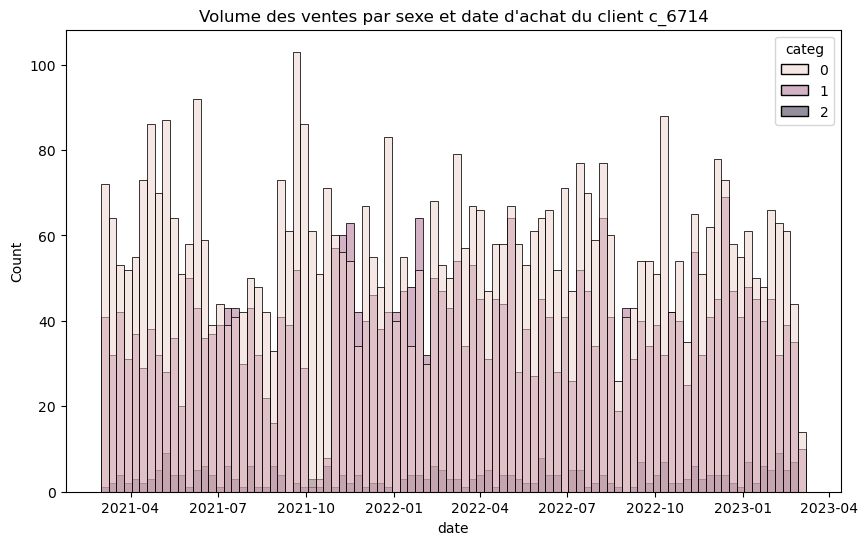

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_pro[df_pro['client_id']=='c_6714'], x='date', hue='categ', binwidth=8)
plt.title("Volume des ventes par sexe et date d'achat du client c_6714")
plt.show()

La courbe de Lorenz est une représentation graphique de la répartition d'une variable. Il peut s'agir par exemple de la distribution du revenu ou du patrimoine au sein d'une population.

In [73]:
df_final.columns

Index(['client_id', 'total_achats', 'nombre_achat', 'panier_moyen',
       'frequence_achat_mensuel', 'id_prod', 'date', 'session_id', 'sex',
       'birth', 'age', 'tranche_age', 'price', 'categ', 'year', 'Year_Month',
       'pro_part'],
      dtype='object')

In [74]:
part = df_part.pivot_table(index=['client_id','tranche_age','sex','Year_Month'], values=['client_id', 'total_achats', 'nombre_achat', 'panier_moyen',
       'frequence_achat_mensuel', 'id_prod', 'date', 'session_id', 'sex',
       'birth', 'age', 'tranche_age', 'price', 'categ', 'year', 'Year_Month',
       'pro_part']).reset_index()

In [75]:
part

,client_id,tranche_age,sex,Year_Month,age,birth,categ,frequence_achat_mensuel,nombre_achat,panier_moyen,price,total_achats
0,c_1,60-69,m,2021-06,68,1955,0.0,1.791667,43,14.628372,19.530,629.02
1,c_1,60-69,m,2021-07,68,1955,0.0,1.791667,43,14.628372,13.805,629.02
2,c_1,60-69,m,2021-08,68,1955,0.0,1.791667,43,14.628372,13.960,629.02
3,c_1,60-69,m,2021-09,68,1955,0.0,1.791667,43,14.628372,9.990,629.02
4,c_1,60-69,m,2021-10,68,1955,0.8,1.791667,43,14.628372,15.766,629.02
...,...,...,...,...,...,...,...,...,...,...,...,...
138096,c_999,50-59,m,2022-10,59,1964,0.0,1.916667,46,15.247826,8.570,701.40
138097,c_999,50-59,m,2022-11,59,1964,1.0,1.916667,46,15.247826,17.745,701.40
138098,c_999,50-59,m,2022-12,59,1964,1.0,1.916667,46,15.247826,15.990,701.40
138099,c_999,50-59,m,2023-01,59,1964,0.4,1.916667,46,15.247826,12.238,701.40


In [135]:
df_part['price'].sum()

11138377.460000003

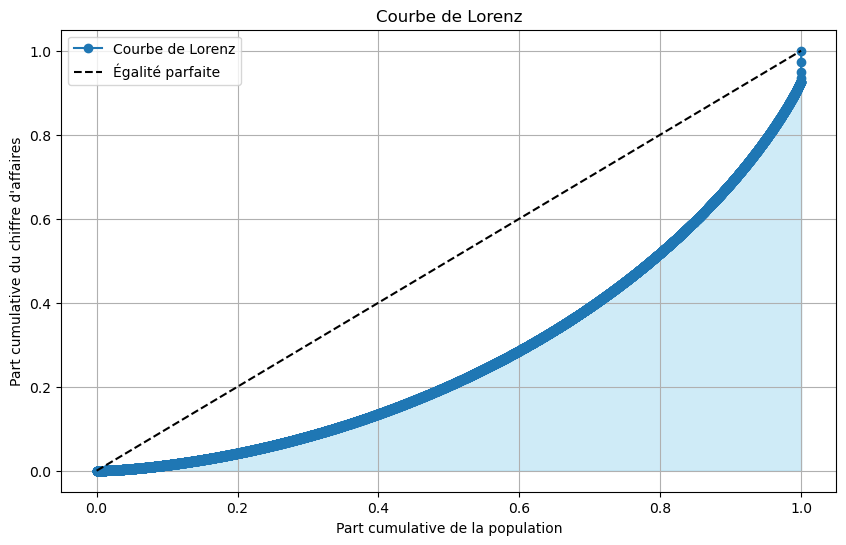

Indice de Gini : 0.442


In [76]:
# courbe de lorenz avec que les clients totals
df_lorenz = df_final.sort_values(by='price', ascending=True)
df_grouped = df_lorenz.groupby('client_id')['price'].sum().sort_values()

# Calculer les proportions cumulées
cumulative_population = df_grouped.index.to_series().reset_index(drop=True).reset_index()
cumulative_population['cumulative_population'] = (cumulative_population['index'] + 1) / cumulative_population['index'].max()

cumulative_revenue = df_grouped.cumsum() / df_grouped.sum()
n = len(cumulative_population)
# Tracer la courbe de Lorenz
plt.figure(figsize=(10, 6))
plt.plot(cumulative_population['cumulative_population'], cumulative_revenue, marker='o', label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], 'k--', label='Égalité parfaite')
plt.fill_between(cumulative_population['cumulative_population'], cumulative_revenue, color='skyblue', alpha=0.4)
plt.xlabel('Part cumulative de la population')
plt.ylabel('Part cumulative du chiffre d\'affaires')
plt.title('Courbe de Lorenz')
plt.legend()
plt.grid(True)
plt.show()

# Calcul de l'indice de Gini
AUC = (cumulative_revenue.sum() -cumulative_revenue[-1]/2 -cumulative_revenue[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

print(f'Indice de Gini : {gini:.3f}')

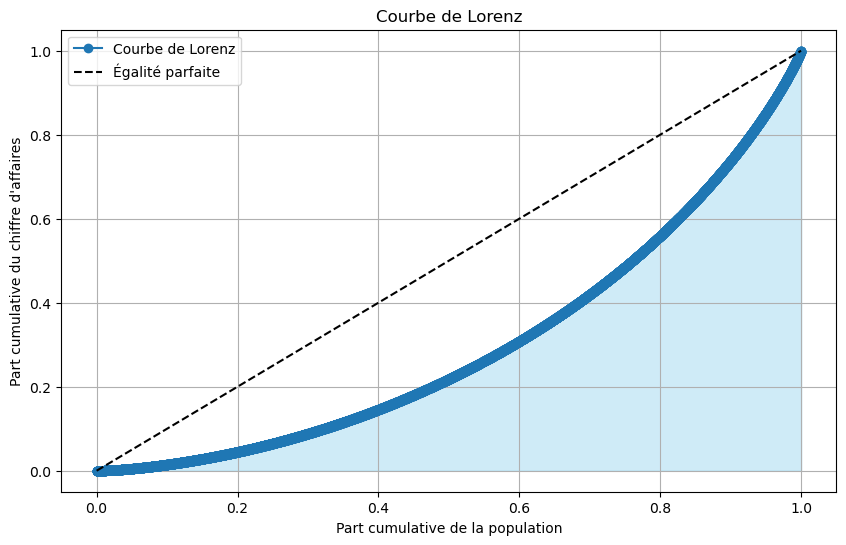

Indice de Gini : 0.398


In [77]:
# # courbe de lorenz avec que les clients particuliers
df_lorenz = df_part.sort_values(by='price', ascending=True)
df_grouped = df_lorenz.groupby('client_id')['price'].sum().sort_values()

# Calculer les proportions cumulées
cumulative_population = df_grouped.index.to_series().reset_index(drop=True).reset_index()
cumulative_population['cumulative_population'] = (cumulative_population['index'] + 1) / cumulative_population['index'].max()

cumulative_revenue = df_grouped.cumsum() / df_grouped.sum()
n = len(cumulative_population)
# Tracer la courbe de Lorenz
plt.figure(figsize=(10, 6))
plt.plot(cumulative_population['cumulative_population'], cumulative_revenue, marker='o', label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], 'k--', label='Égalité parfaite')
plt.fill_between(cumulative_population['cumulative_population'], cumulative_revenue, color='skyblue', alpha=0.4)
plt.xlabel('Part cumulative de la population')
plt.ylabel('Part cumulative du chiffre d\'affaires')
plt.title('Courbe de Lorenz')
plt.legend()
plt.grid(True)
plt.show()

# Calcul de l'indice de Gini
AUC = (cumulative_revenue.sum() -cumulative_revenue[-1]/2 -cumulative_revenue[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

print(f'Indice de Gini : {gini:.3f}')

In [78]:
# tranche age sexe féminin
f = part.loc[part['sex']=='f']
client_f= f.groupby(['tranche_age'])[['sex']].count().sort_values(by='tranche_age',ascending=False).reset_index()
client_f

,tranche_age,sex
0,90-99,226
1,80-89,1965
2,70-79,4567
3,60-69,8682
4,50-59,13229
5,40-49,16975
6,30-39,13980
7,20-29,9610
8,10-19,2887


In [79]:
# tranche age sexe masculin
m = part.loc[part['sex']=='m']
client_m= m.groupby(['tranche_age'])[['sex']].count().sort_values(by='tranche_age',ascending=False).reset_index()
client_m

,tranche_age,sex
0,90-99,139
1,80-89,1458
2,70-79,3561
3,60-69,8242
4,50-59,11989
5,40-49,15352
6,30-39,13716
7,20-29,8776
8,10-19,2747


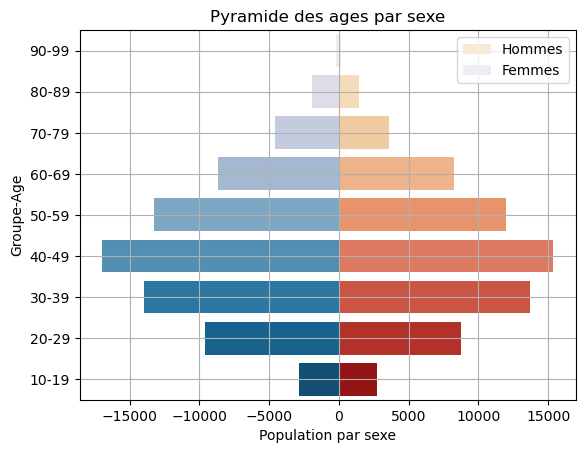

In [80]:
# pas de différence dans la pyramide des ages entre les hommes et les femmes
bar_plot = sns.barplot(x=client_m.sex, y=client_m.tranche_age, data=client_m, order=client_m.tranche_age, palette='OrRd', lw=0,label = 'Hommes')

bar_plot = sns.barplot(x=-client_f.sex, y=client_f.tranche_age, data=client_f, order=client_f.tranche_age, palette='PuBu', lw=0, label = 'Femmes')
bar_plot.set(xlabel="Population par sexe", ylabel="Groupe-Age", title = "Pyramide des ages par sexe")
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Répartition de commande entre les femmes et les hommes')

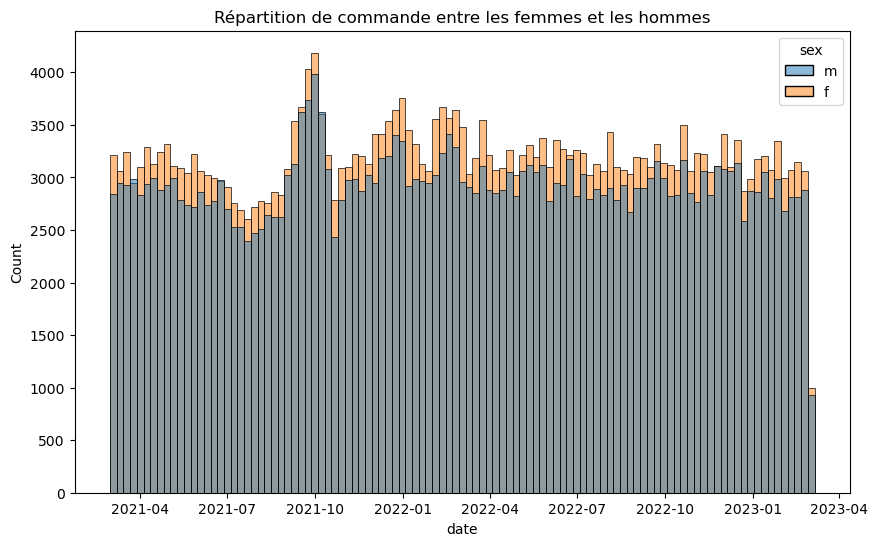

In [81]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_part, x='date', hue='sex', binwidth=7)
plt.title('Répartition de commande entre les femmes et les hommes')

In [82]:
# regrouper par année/mois/jour la somme des prix
df_ca_mois = df_part.groupby('Year_Month')['price'].sum().to_frame()
df_ca_mois = df_ca_mois.reset_index()
df_ca_mois.set_index(['Year_Month'], inplace = True)

,price
Year_Month,
2021-03,445918.71
2021-04,439337.85
2021-05,454887.46
2021-06,447102.17
2021-07,447593.15
2021-08,446002.30
2021-09,470921.80
2021-10,462407.67
2021-11,478092.08


In [83]:
df_ca = df_final.groupby('Year_Month')['price'].sum().to_frame()
df_ca = df_ca.reset_index()
df_ca.set_index(['Year_Month'], inplace = True)

,price
Year_Month,
2021-03,482440.61
2021-04,476109.30
2021-05,492943.47
2021-06,484088.56
2021-07,482835.40
2021-08,482284.79
2021-09,507240.68
2021-10,489743.61
2021-11,516167.73


In [84]:
df_ca.index = pd.to_datetime(df_ca.index)

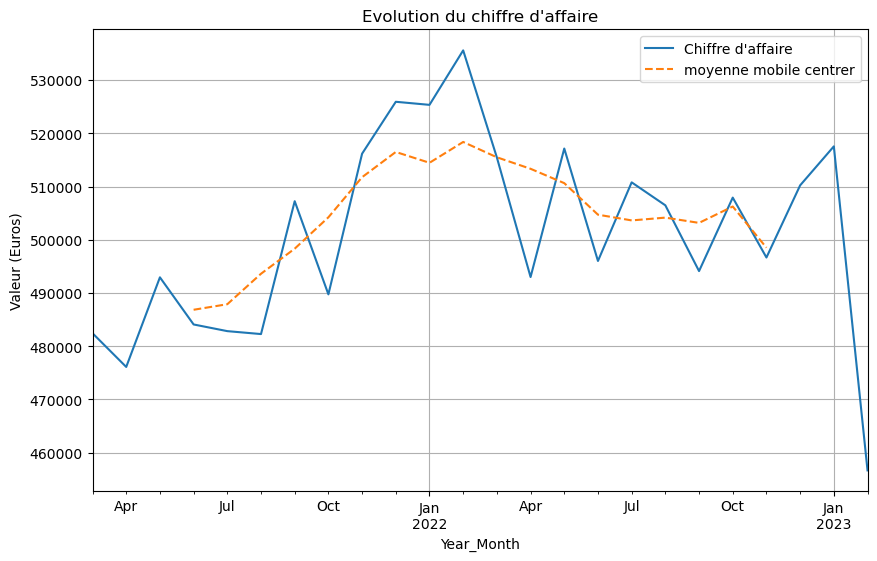

In [85]:
plt.figure(figsize=(10,6))
df_ca['price'].plot(label="Chiffre d'affaire")
df_ca['price'].rolling(window=7,center=True).mean().plot(label='moyenne mobile centrer',ls='--')
plt.legend()
plt.title("Evolution du chiffre d'affaire")
plt.ylabel('Valeur (Euros)')
plt.grid()
plt.show()

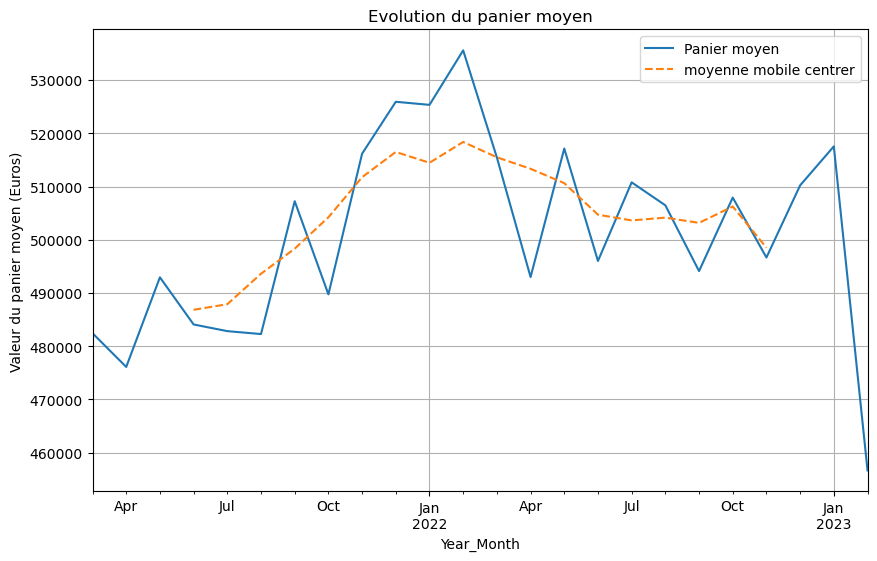

In [86]:
plt.figure(figsize=(10,6))
df_ca['price'].resample('M').mean().plot(label='Panier moyen')
df_ca['price'].resample('M').mean().rolling(window=7,center=True).mean().plot(label='moyenne mobile centrer',ls='--')
plt.legend()
plt.title('Evolution du panier moyen')
plt.ylabel('Valeur du panier moyen (Euros)')
plt.grid()
plt.show()

In [87]:
part.index = pd.to_datetime(part.Year_Month)

In [88]:
# je fais en sorte que l'index nous sert de datetime
df_ca_mois.index = pd.to_datetime(df_ca_mois.index)

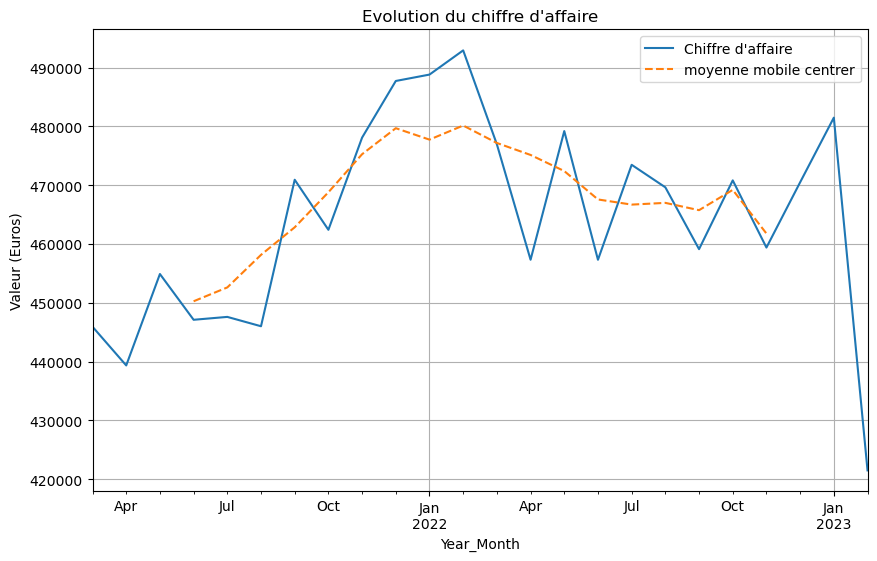

In [89]:
# chiffre d'affaire global au file du temps
plt.figure(figsize=(10,6))
df_ca_mois['price'].plot(label="Chiffre d'affaire")
df_ca_mois['price'].rolling(window=7,center=True).mean().plot(label='moyenne mobile centrer',ls='--')
plt.legend()
plt.title("Evolution du chiffre d'affaire")
plt.ylabel('Valeur (Euros)')
plt.grid()
plt.show()

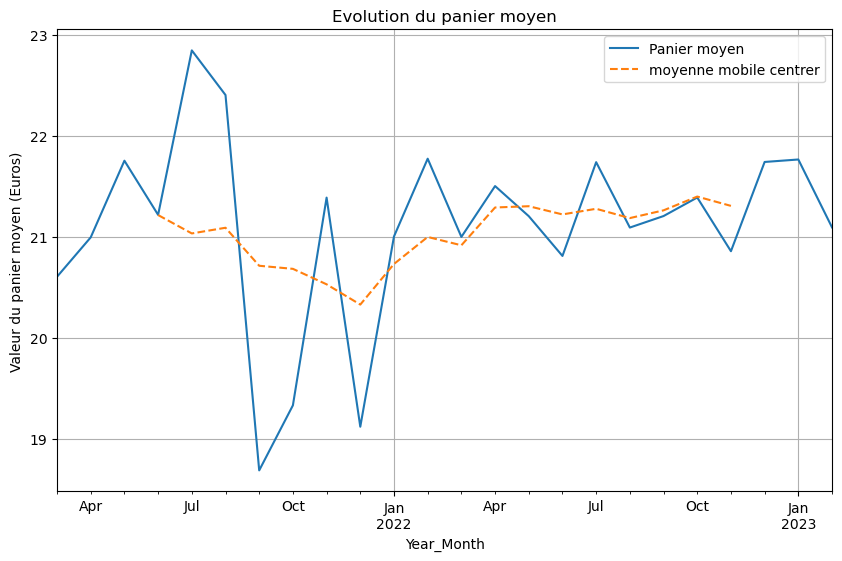

In [90]:
# evolution du panier moyen (kpi)
plt.figure(figsize=(10,6))
part['price'].resample('M').mean().plot(label='Panier moyen')
part['price'].resample('M').mean().rolling(window=7,center=True).mean().plot(label='moyenne mobile centrer',ls='--')
plt.legend()
plt.title('Evolution du panier moyen')
plt.ylabel('Valeur du panier moyen (Euros)')
plt.grid()
plt.show()

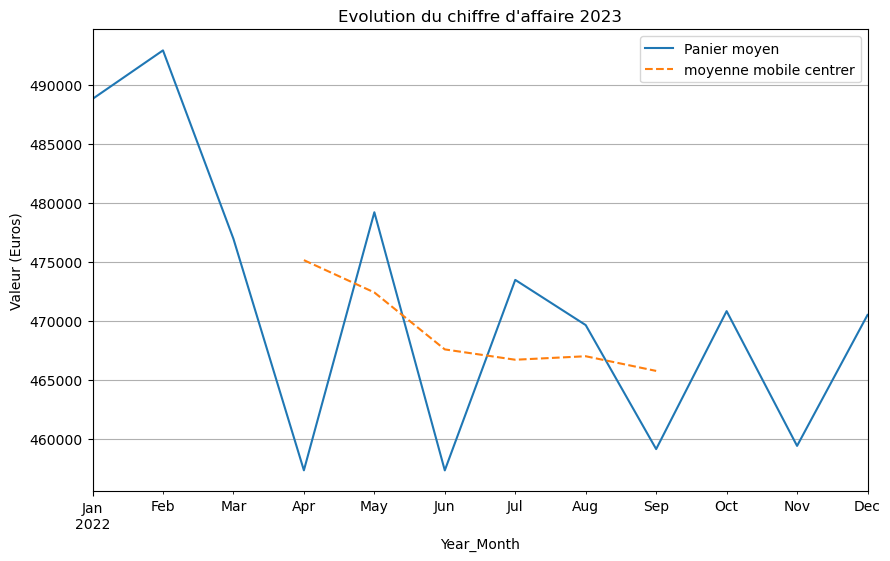

In [91]:
# chiffre d'affaire global au file du temps
plt.figure(figsize=(10,6))
df_ca_mois.loc['2022','price'].plot(label='Panier moyen')
df_ca_mois.loc['2022','price'].rolling(window=7,center=True).mean().plot(label='moyenne mobile centrer',ls='--')
plt.legend()
plt.title("Evolution du chiffre d'affaire 2023")
plt.ylabel('Valeur (Euros)')
plt.grid()
plt.show()

1 - Le lien entre le genre d'un client et les catégories de livres achetés - Analyse QUALITATIF / QUALITATIF -> heatmap
2 - Le lien entre l'âge des clients et le montant total des achats - Analyse QUALITATIF / QUANTITATIF
3 - Le lien entre l'âge des clients et la fréquence des achats - Analyse QUALITATIF / QUANTITATIF - > boite à moustache
4 - Le lien entre l'âge des clients et la taille du panier moyen - Analyse QUALITATIF / QUANTITATIF
5 - Le lien entre l'âge des clients et les catégories de livres achetés - Analyse QUALITATIF / QUALITATIF

In [92]:
#sns.pairplot(df_part)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> SEXE et CATEGORIE </h3>
</div>

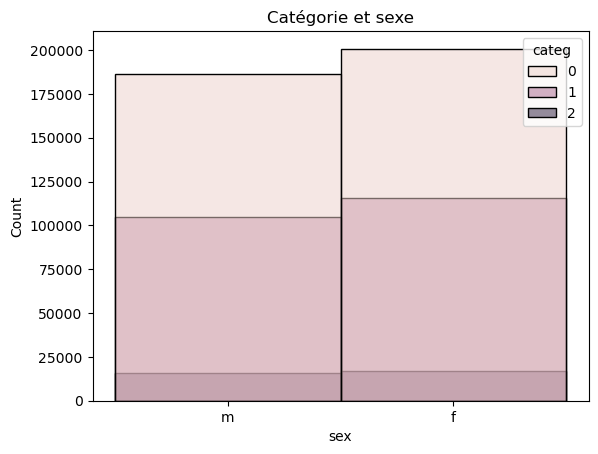

In [93]:
sns.histplot(data=df_part,x='sex', hue='categ')
plt.title('Catégorie et sexe')
plt.show()

In [94]:
cont = pd.crosstab(df_part['sex'],df_part['categ'])
cont

categ,0,1,2
sex,,,
f,200793,115592,16980
m,186488,104777,15868


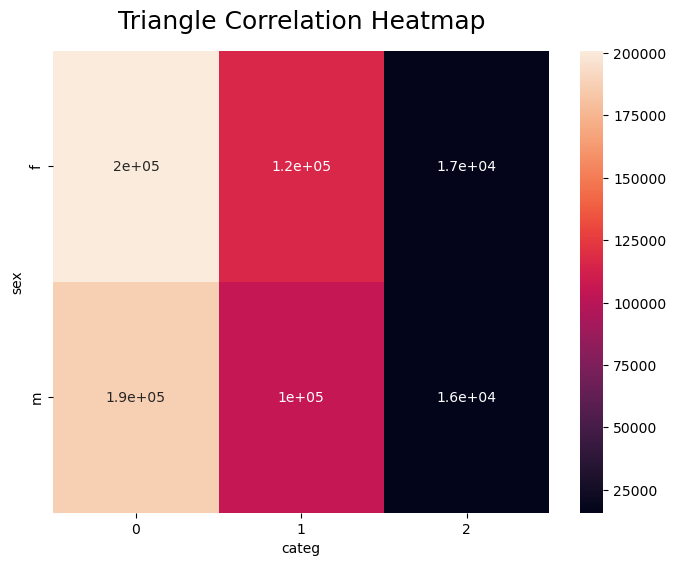

In [95]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cont,annot=True)
ax.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

niveau de certitude", que l'on appelle seuil de significativité (P-Value)

test de l'indépendance :


 H0 : Variables indépendantes si p-value > 5%
 H1 : Variables non indépendantes si p-value < 5%

Plus la valeur de p est petite, plus la probabilité de faire une erreur en rejetant l'hypothèse nulle est faible. Une valeur limite de 0,05 est souvent utilisée. Autrement dit, vous pouvez rejeter l'hypothèse nulle si la valeur de p est inférieure à 0,05

condition de validité du test :
    
    1: Les mesures sont indépendantes
    2: Pas d'effectifs théoriques inférieurs à 5 dans les cases du tableau
    
les conditions sont respectées pour le test paramétrique

In [96]:
# test Khi-2
alpha = 0.05
chi2, pvalue, degrees, expected = chi2_contingency(cont)

# affichage du résultat
print("test Khi-2's correlation coefficient:", chi2)
print("p-value:", pvalue)

if pvalue > alpha:
    print("H0 : Les deux variables qualitatives sont indépendantes si p-value > 5%")
else:
    print('H1 : Les deux variables qualitatives dépendent l’une de l’autre si p-value < 5%')

test Khi-2's correlation coefficient: 22.483190290238603
p-value: 1.3117082821156392e-05
H1 : Les deux variables qualitatives dépendent l’une de l’autre si p-value < 5%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> AGE et MONTANT TOTAL </h3>
</div>

La question c'est "est-ce que l'âge a un effet sur le montant d'achat total ?"

In [97]:
df_final.groupby(['tranche_age'])[['price']].sum().sort_values(by='tranche_age',ascending=False).reset_index()

,tranche_age,price
0,90-99,20853.52
1,80-89,197717.34
2,70-79,446162.75
3,60-69,980196.14
4,50-59,1873582.52
5,40-49,3101496.63
6,30-39,2484468.37
7,20-29,2301832.66
8,10-19,616363.62


In [98]:
df_tranche_age_montant = df_part.pivot_table(index=['client_id','tranche_age']).reset_index()
df_tranche_age_montant

,client_id,tranche_age,age,birth,categ,frequence_achat_mensuel,nombre_achat,panier_moyen,price,total_achats
0,c_1,60-69,68,1955,0.325581,1.791667,43,14.628372,14.628372,629.02
1,c_10,60-69,67,1956,0.724138,2.416667,58,23.337931,23.337931,1353.60
2,c_100,30-39,31,1992,0.875000,0.333333,8,31.856250,31.856250,254.85
3,c_1000,50-59,57,1966,0.658730,5.250000,126,18.189524,18.189524,2291.88
4,c_1001,40-49,41,1982,0.330097,4.291667,103,17.707282,17.707282,1823.85
...,...,...,...,...,...,...,...,...,...,...
8591,c_995,60-69,68,1955,0.214286,0.583333,14,13.529286,13.529286,189.41
8592,c_996,50-59,53,1970,0.583333,4.000000,96,17.055625,17.055625,1637.34
8593,c_997,20-29,29,1994,0.864407,2.458333,59,25.254407,25.254407,1490.01
8594,c_998,20-29,22,2001,1.254545,2.291667,55,51.313091,51.313091,2822.22


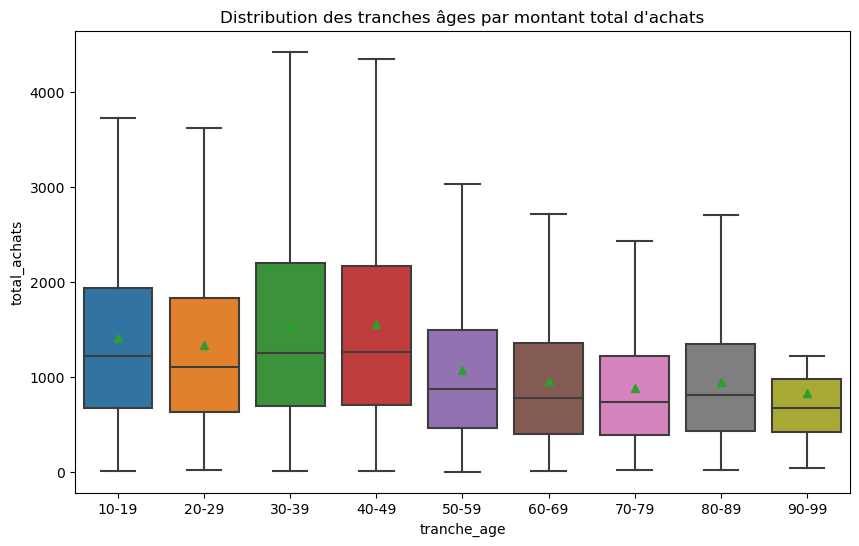

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_tranche_age_montant, x='tranche_age', y='total_achats', showfliers=False, showmeans=True)
plt.title("Distribution des tranches âges par montant total d'achats")
plt.show()

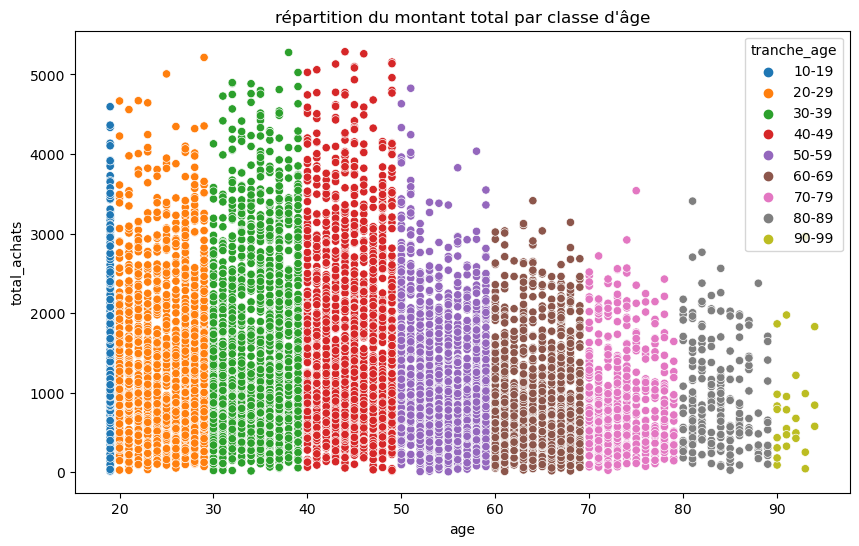

In [100]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_tranche_age_montant, x='age', y='total_achats', hue='tranche_age')
plt.title("répartition du montant total par classe d'âge")
plt.show()
# la distribution n'est pas normal

In [101]:
# première méthode pour vérifier si la distribution est normal
stats.kstest(df_tranche_age_montant['total_achats'], 'norm')

KstestResult(statistic=0.9999999998604823, pvalue=0.0, statistic_location=6.31, statistic_sign=-1)

In [102]:
# deuxième méthode pour vérifier si la distribution est normal
stats.normaltest(df_tranche_age_montant['total_achats'])

NormaltestResult(statistic=1455.9612173868243, pvalue=0.0)

In [103]:
stats.anderson(df_tranche_age_montant['total_achats'], dist='norm')

AndersonResult(statistic=227.2086837070692, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1295.7628501628665, scale=958.3829405003696)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Text(0.5, 1.0, "Densité du montant total d'achats")

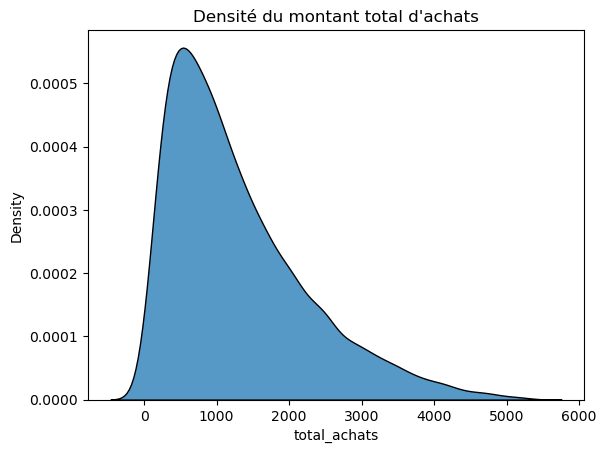

In [104]:
# Distribution du panier moyen pour représenter une loi de probabilité
sns.kdeplot(data = df_tranche_age_montant, x="total_achats", multiple = "stack")
plt.title("Densité du montant total d'achats")

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

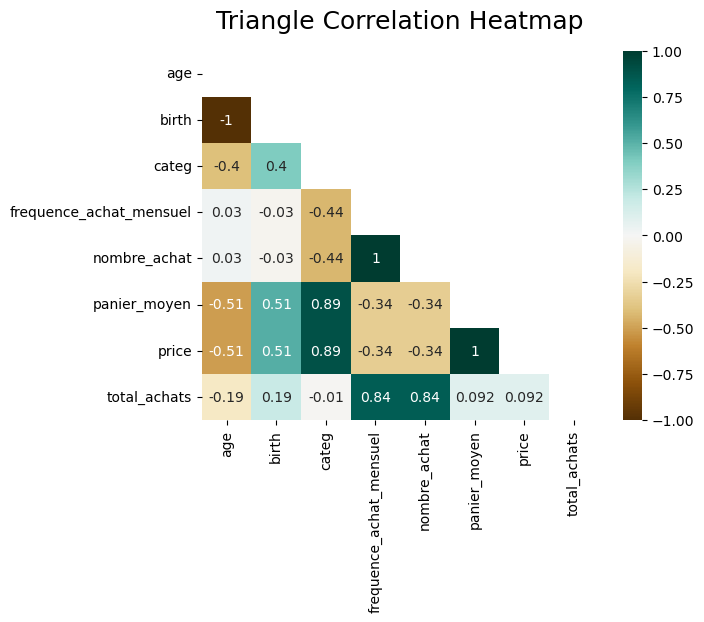

In [105]:
mask = np.triu(np.ones_like(df_part.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_tranche_age_montant.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

condition de validité du test :
    
    1: Au moins 20 individus dans l'échantillon (recommandé)
    2: Chaque variable suit une distribution normale
    
les conditions sont ne respectées pour le test paramétrique, nous allons donc procéder aux tests de spearman (non paramétrique)

In [106]:
# le montant total dépensé change t'il en fonction de l'age du client ?

corr, pval = spearmanr(df_tranche_age_montant["age"],df_tranche_age_montant["total_achats"])

# affichage du résultat
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

if pval > alpha:
    print("H0 : Variables non corrélées si p-value > 5%")
else:
    print('H1 : Variables corrélées : p-value < 5%')

Spearman's correlation coefficient: -0.18459446188210693
p-value: 9.306487203202235e-67
H1 : Variables corrélées : p-value < 5%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> AGE et FREQUENCE D'ACHAT </h3>
</div>

In [107]:
df_age_frequence = df_part.pivot_table(index=['client_id','tranche_age']).reset_index()
df_age_frequence

,client_id,tranche_age,age,birth,categ,frequence_achat_mensuel,nombre_achat,panier_moyen,price,total_achats
0,c_1,60-69,68,1955,0.325581,1.791667,43,14.628372,14.628372,629.02
1,c_10,60-69,67,1956,0.724138,2.416667,58,23.337931,23.337931,1353.60
2,c_100,30-39,31,1992,0.875000,0.333333,8,31.856250,31.856250,254.85
3,c_1000,50-59,57,1966,0.658730,5.250000,126,18.189524,18.189524,2291.88
4,c_1001,40-49,41,1982,0.330097,4.291667,103,17.707282,17.707282,1823.85
...,...,...,...,...,...,...,...,...,...,...
8591,c_995,60-69,68,1955,0.214286,0.583333,14,13.529286,13.529286,189.41
8592,c_996,50-59,53,1970,0.583333,4.000000,96,17.055625,17.055625,1637.34
8593,c_997,20-29,29,1994,0.864407,2.458333,59,25.254407,25.254407,1490.01
8594,c_998,20-29,22,2001,1.254545,2.291667,55,51.313091,51.313091,2822.22


In [108]:
df_freq = df_age_frequence.loc[:,['age','frequence_achat_mensuel']].sort_values(by='frequence_achat_mensuel')

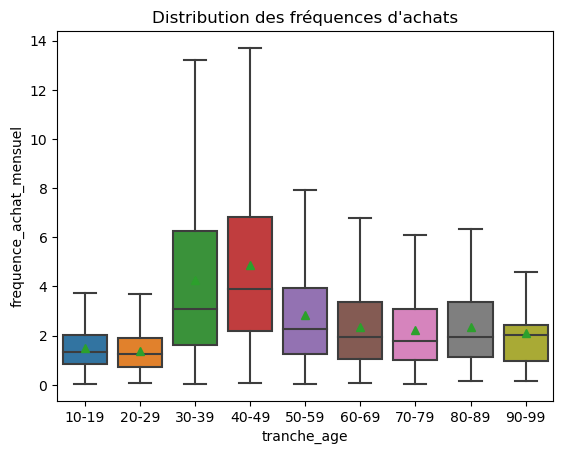

In [109]:
sns.boxplot(data=df_age_frequence, x='tranche_age', y='frequence_achat_mensuel', showfliers=False, showmeans=True)
plt.title("Distribution des fréquences d'achats")
plt.show()

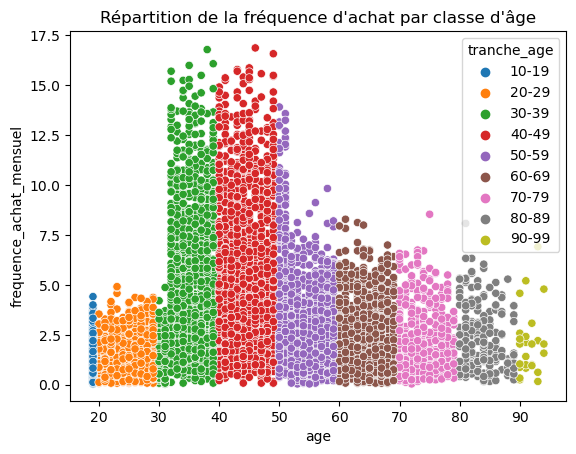

In [110]:
sns.scatterplot(data=df_age_frequence, x='age', y='frequence_achat_mensuel', hue='tranche_age')
plt.title("Répartition de la fréquence d'achat par classe d'âge")
plt.show()

In [111]:
# première méthode pour vérifier si la distribution est normal
stats.kstest(df_age_frequence['frequence_achat_mensuel'], 'norm')

KstestResult(statistic=0.6469038200600888, pvalue=0.0, statistic_location=0.8333333333333334, statistic_sign=-1)

In [112]:
# deuxime méthode pour vérifier si la distribution est normal
stats.normaltest(df_age_frequence['frequence_achat_mensuel'], axis=0, nan_policy='propagate')

NormaltestResult(statistic=2823.455407451845, pvalue=0.0)

In [113]:
stats.anderson(df_age_frequence['frequence_achat_mensuel'], dist='norm')

AndersonResult(statistic=474.184920622376, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.104631999379556, scale=2.8364393402633814)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Text(0.5, 1.0, "Densité de la fréquence d'achats")

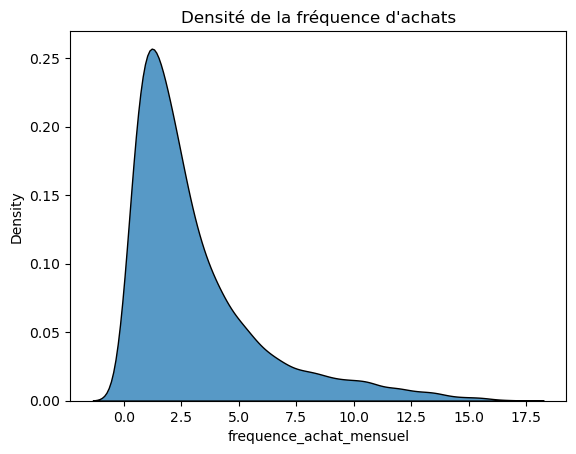

In [114]:
# j'observe la densité de la fréquence d'achat pour représenter une loi de probabilité
sns.kdeplot(data = df_age_frequence, x="frequence_achat_mensuel", multiple = "stack")
plt.title("Densité de la fréquence d'achats")

In [115]:
df_age_frequence.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,age,birth,categ,frequence_achat_mensuel,nombre_achat,panier_moyen,price,total_achats
age,1.0,-1.0,-0.25,0.13,0.13,-0.33,-0.33,-0.18
birth,-1.0,1.0,0.25,-0.13,-0.13,0.33,0.33,0.18
categ,-0.25,0.25,1.0,-0.5,-0.5,0.91,0.91,-0.059
frequence_achat_mensuel,0.13,-0.13,-0.5,1.0,1.0,-0.44,-0.44,0.83
nombre_achat,0.13,-0.13,-0.5,1.0,1.0,-0.44,-0.44,0.83
panier_moyen,-0.33,0.33,0.91,-0.44,-0.44,1.0,1.0,0.026
price,-0.33,0.33,0.91,-0.44,-0.44,1.0,1.0,0.026
total_achats,-0.18,0.18,-0.059,0.83,0.83,0.026,0.026,1.0


condition de validité du test :
    
    1: Au moins 20 individus dans l'échantillon (recommandé)
    2: Chaque variable suit une distribution normale
    
les conditions sont ne respectées pour le test paramétrique, nous allons donc procéder aux tests de spearman (non paramétrique)

In [116]:
corr, pval = spearmanr(df_tranche_age_montant["age"],df_tranche_age_montant["frequence_achat_mensuel"])
 
# affichage du résultat
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

if pval > alpha:
    print("H0 : Variables non corrélées si p-value > 5%")
else:
    print('H1 : Variables corrélées p-value < 5%')

Spearman's correlation coefficient: 0.12763517799959537
p-value: 1.4939249703904833e-32
H1 : Variables corrélées p-value < 5%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> AGE et TAILLE PANIER MOYEN </h3>
</div>

In [117]:
df_age_panier_moyen = df_part.pivot_table(index=['client_id','tranche_age']).reset_index()
df_age_panier_moyen

,client_id,tranche_age,age,birth,categ,frequence_achat_mensuel,nombre_achat,panier_moyen,price,total_achats
0,c_1,60-69,68,1955,0.325581,1.791667,43,14.628372,14.628372,629.02
1,c_10,60-69,67,1956,0.724138,2.416667,58,23.337931,23.337931,1353.60
2,c_100,30-39,31,1992,0.875000,0.333333,8,31.856250,31.856250,254.85
3,c_1000,50-59,57,1966,0.658730,5.250000,126,18.189524,18.189524,2291.88
4,c_1001,40-49,41,1982,0.330097,4.291667,103,17.707282,17.707282,1823.85
...,...,...,...,...,...,...,...,...,...,...
8591,c_995,60-69,68,1955,0.214286,0.583333,14,13.529286,13.529286,189.41
8592,c_996,50-59,53,1970,0.583333,4.000000,96,17.055625,17.055625,1637.34
8593,c_997,20-29,29,1994,0.864407,2.458333,59,25.254407,25.254407,1490.01
8594,c_998,20-29,22,2001,1.254545,2.291667,55,51.313091,51.313091,2822.22


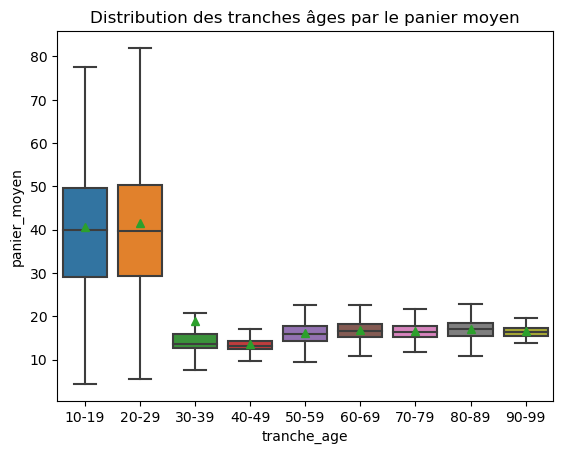

In [118]:
sns.boxplot(data=df_age_panier_moyen, x='tranche_age', y='panier_moyen', showfliers=False, showmeans=True)
plt.title("Distribution des tranches âges par le panier moyen")
plt.show()

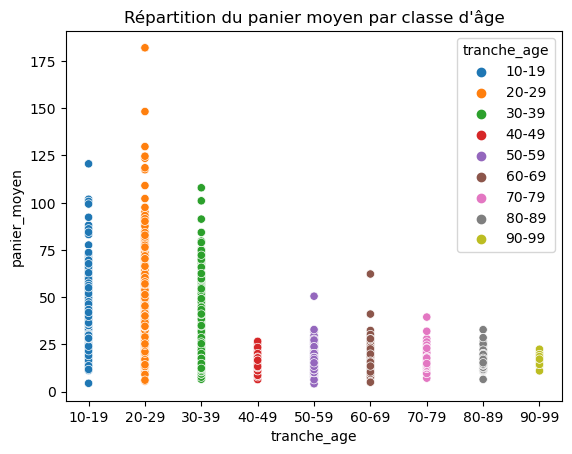

In [119]:
sns.scatterplot(data=df_age_panier_moyen, x='tranche_age', y='panier_moyen', hue='tranche_age')
plt.title("Répartition du panier moyen par classe d'âge")
plt.show()

In [120]:
df_panier = df_age_panier_moyen.loc[:,['age','panier_moyen']].sort_values(by='panier_moyen')

In [121]:
# première méthode pour vérifier si la distribution est normal
stats.kstest(df_age_panier_moyen['panier_moyen'], 'norm')

KstestResult(statistic=0.9999833762362703, pvalue=0.0, statistic_location=4.15, statistic_sign=-1)

In [122]:
# # deuxime méthode pour vérifier si la distribution est normal
stats.normaltest(df_age_frequence['panier_moyen'], axis=0, nan_policy='propagate')

NormaltestResult(statistic=4555.407879186266, pvalue=0.0)

In [123]:
stats.anderson(df_age_frequence['panier_moyen'], dist='norm')

AndersonResult(statistic=989.2624491193947, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=21.926846048899698, scale=14.642087285882134)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Text(0.5, 1.0, 'Densité du panier moyen')

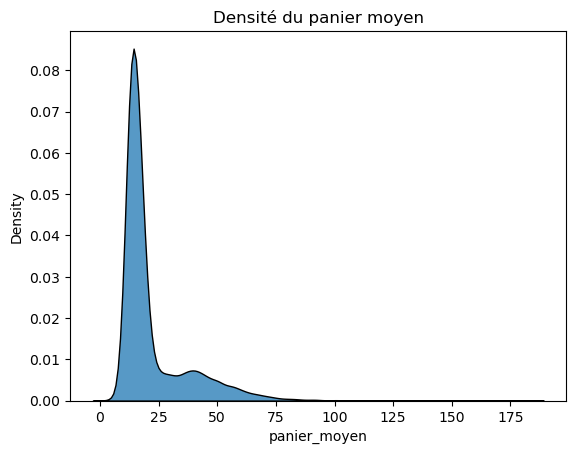

In [124]:

# distribution du panier moyen pour représenter une loi de probabilité
sns.kdeplot(data = df_panier, x="panier_moyen", multiple = "stack")
plt.title("Densité du panier moyen")

In [125]:
df.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,nombre_achat
nombre_achat,1.0


condition de validité du test :
    
    1: Au moins 20 individus dans l'échantillon (recommandé)
    2: Chaque variable suit une distribution normale
    
les conditions sont ne respectées pour le test paramétrique, nous allons donc procéder aux tests de spearman (non paramétrique)

In [126]:
corr, pval = spearmanr(df_age_panier_moyen["age"],df_age_panier_moyen["panier_moyen"])
 
# affichage du résultat
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

if pval > alpha:
    print("H0 : Variables non corrélées si p-value > 5%")
else:
    print('H1 : Variables corrélées p-value < 5%')

Spearman's correlation coefficient: -0.32554785887187865
p-value: 2.279902481899712e-211
H1 : Variables corrélées p-value < 5%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> AGE et CATEGORIE LIVRES </h3>
</div>

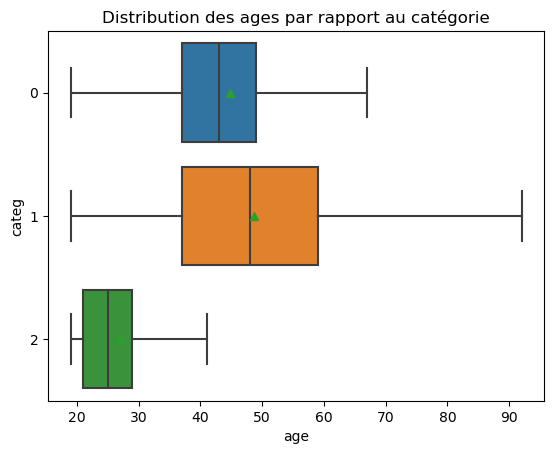

In [127]:
sns.boxplot(data=df_part, x='age', y='categ', orient='h', showfliers=False, showmeans=True)
plt.title("Distribution des ages par rapport au catégorie")
plt.show()

In [128]:
# moyenne des trois groupes
df_part.groupby('categ')['age'].mean()

categ
0    44.794563
1    48.652900
2    26.965508
Name: age, dtype: float64

In [129]:
# variance des trois groupes
df_part.groupby('categ')['age'].var()

categ
0    132.620783
1    250.406549
2     98.007304
Name: age, dtype: float64

Text(0.5, 1.0, 'Densité des moyennes avec le graphique des moyennes')

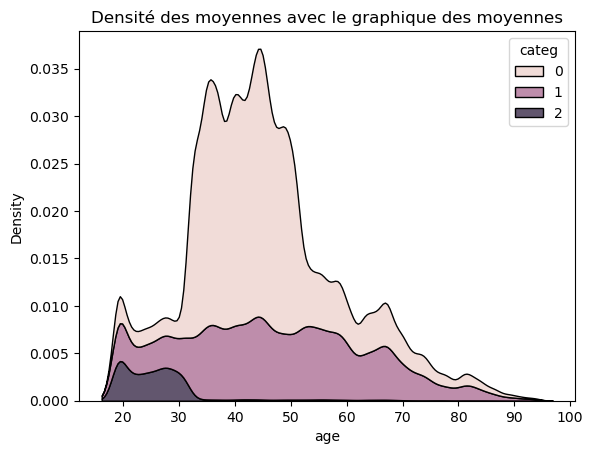

In [130]:
# Densité pour observer la distribution des ages en fonction de la catégorie
sns.kdeplot(data = df_part, x="age", hue = "categ", multiple = "stack")
plt.title("Densité des moyennes avec le graphique des moyennes")

Text(0.5, 1.0, "Points représentent les moyennes d'age")

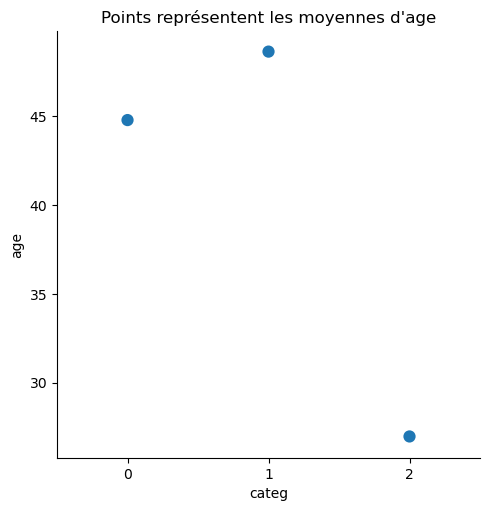

In [131]:
# on observe la moyenne des ages par catégorie
sns.catplot(
    data=df_part, x="categ", y="age", kind = "point", join= False)
plt.title("Points représentent les moyennes d'age")

condition de validité du test :
    
    1: Les mesures sont indépendantes , oui
    2: Les échantillons ont des variances égales, non
    3: Les résidus suivent une distribution normale (supposée ou vérifiée), non
    4: Au moins 20 individus dans le dispositif, ou normalité des résidus supposée ou vérifiée
    
    
les conditions sont ne respectées pour le test paramétrique, nous allons donc procéder aux tests de Kruskal-Wallis (non paramétrique)

In [132]:
corr, pval = stats.kruskal(df_part["age"][df_part["categ"] == 0],
df_part["age"][df_part["categ"] == 1],
df_part["age"][df_part["categ"] == 2])
print("corr:",corr,"pval:", pval)
if pval > alpha:
    print("H0 : Variables indépendantes si p-value > 5%")
else:
    print('H1 : Variables non indépendantes p-value < 5%')

corr: 71374.94615497025 pval: 0.0
H1 : Variables non indépendantes p-value < 5%
